<a href="https://colab.research.google.com/github/pragneshrana/LearnDataScience/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: 

1.   https://arxiv.org/pdf/1812.08434.pdf
2.   https://arxiv.org/abs/2011.02260


Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs. Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs.

Application:

* Image classification by word embedding using ZSL

  Zero shot learning (ZSL) refers to trying to learn to recognise classes that the model has not encountered in its training.
* Text : text classification, sequence labelling, machine translation, relation and event extraction
* Combinatorial Optimization: minimum vertex cover problem, maximum cut, the travelling salesman problem, minimum spanning tree, etc.
*   Recommender Systems
*   Social influence prediction
* Medica/Pharmacy 
*   https://arxiv.org/pdf/1812.08434.pdf


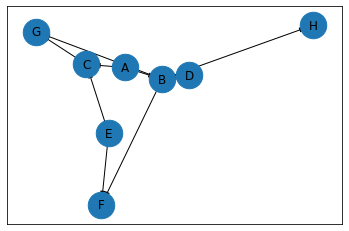

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

## What is the way to represent the above graph in machine format?

#### The adjacency matrix from the above graph can be written as,
$
\begin{matrix}
&A&B & C & D & E & F & G & H\\
\end{matrix} \\
\begin{matrix}
A\\
B\\
C\\
D\\
E\\
F\\
G\\
H\\ 
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$

The other two type matrix tcan be:
- Incident Matrix (nodes X edges)
- Degree matrix (nodes X nodes) [number of edges attached to each node--2 for self connection] (Diagonal Matrix)

- Laplacian matrix (graph laplacian)
  -  $L = D - A$ 
  - Laplace-Beltrami opeartor
  - measure of smothness of a vetrex or How quickly it chnages between the adjacent vertex.

## What can be done with graph?


*   **Node level prediction** -- Data about unlabelled nodel. (Will he/she smoke?) [predicting the identity or role of each node within a graph.] 
*   **Edge level (link) prediction** -- What will be next netflix video? [ given nodes that represent the objects in the image, we wish to predict which of these nodes share an edge or what the value of that edge is. ]
*  **Graph level prediction** --- Is this module suitable for this customer [goal is to predict the property of an entire graph]



## Problems with graph -- Why can't we directly supply it to NN?

neutral-network-diagram.svg

- Input to the neural-net is fixed but graphs size can arbitarily grow.


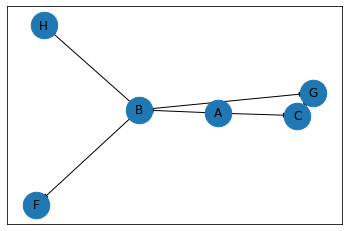

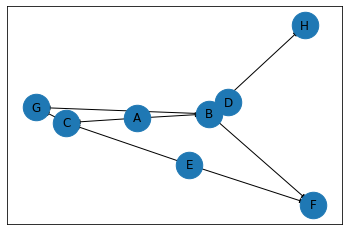

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

## Iso-morphism
- The rotation of graph will change the orientation and order of rows in input matrix. 
We can't directly feed matrix to the neural-net


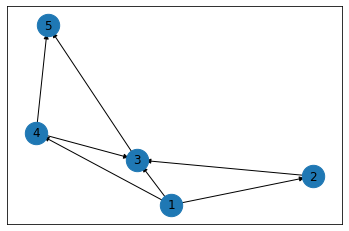

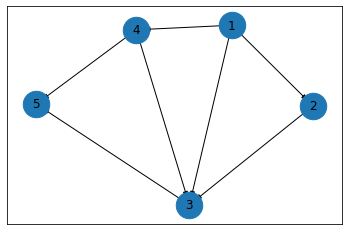

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('1', '2'), ('1', '4'), ('1', '3'), ('4', '3'), ('2', '3'), ('3', '5'), ('4', '5')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

 - if 
  -  not innvariant to node ordering 
  - graphs of same size 

  $
\begin{matrix}
&1&2 & 3 & 4 & 5 & feat...\\
\end{matrix} \\
\begin{matrix}
1\\
2\\
3\\
4\\
5
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 1 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$

- The adjacency matix include node information but nothing about edges


### The more efficient way is to store nodes, edges and adjacency list seperately.



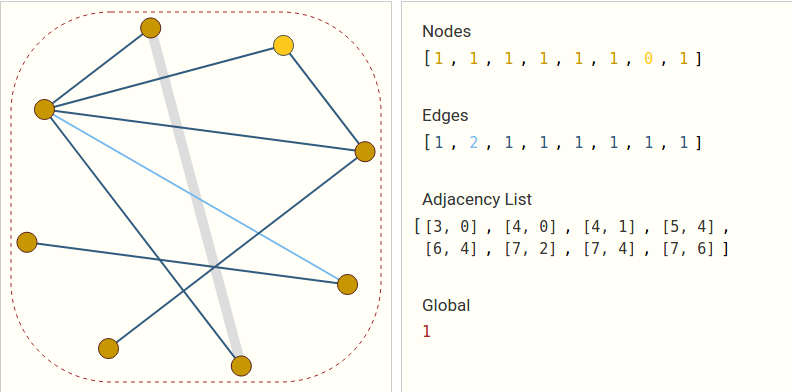

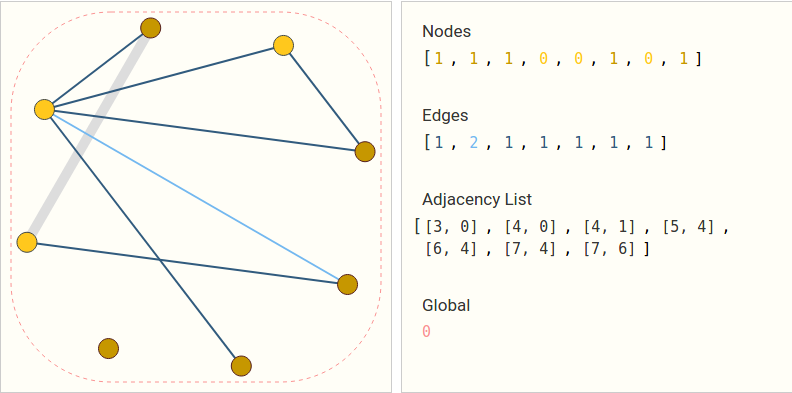


Representation Learning -- Represent graph data such that each node know about all other connected nodes.

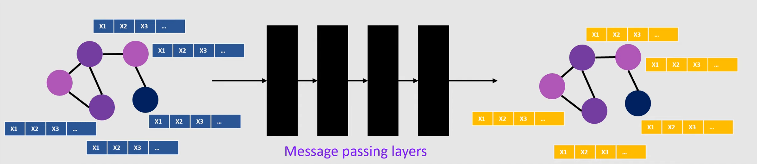

Diffrent Types of Graph Neural Networks (GNN)

    Recurrent graph neural network.
    Spatial convolutional network.
    Spectral convolutional network.


## Spatial Convoltion network

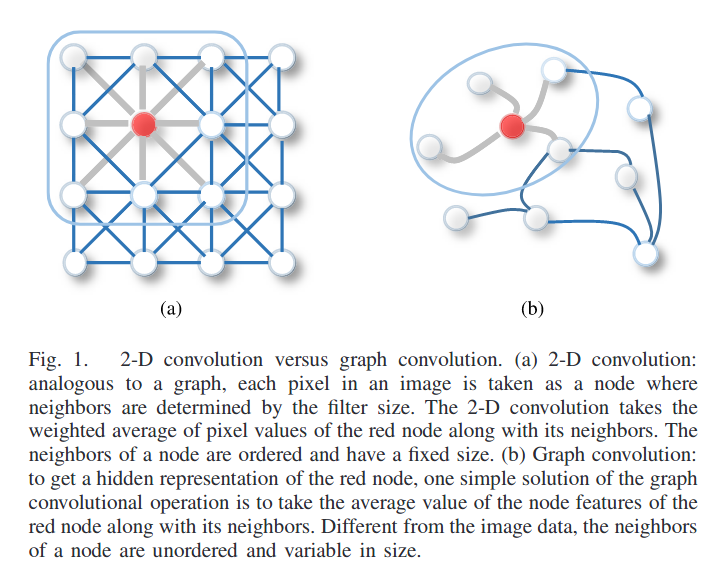

Ref: Wu, Z., Pan, S., Chen, F., Long, G., Zhang, C. and Philip, S.Y., 2020. A comprehensive survey on graph neural networks. IEEE transactions on neural networks and learning systems, 32(1), pp.4-24.

# Graph Convolution (Spectral convolution)
A : Adjacency matrix \\
$\hat{A}$ : A + I (added I to include self loops) \\
$\hat{D}$ : $\hat{A}^{-1}$ (normalizing) \\
X : feature vector \\
W : weight vector (feature reduction) \\

Input to the hidden layer applying relu : \\
= relu($\hat{D}^{-1/2}\cdot \hat{A} \cdot \hat{D}^{-1/2} \cdot  X \cdot W$)


### Nodel level prediction

In [ ]:
#importing libs
from networkx import karate_club_graph, to_numpy_matrix
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#loading data
zkc = karate_club_graph()


In [ ]:
zkc.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

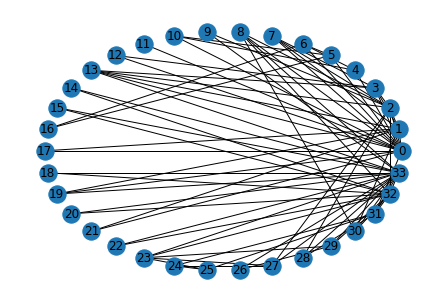

In [ ]:
nx.draw_circular(zkc, with_labels=True)
plt.show()

In [ ]:
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order) #Adjacency matrix
I = np.eye(zkc.number_of_nodes()) #identity matrix
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [ ]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [ ]:
def relu(x):
    return np.maximum(0, x)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [ ]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

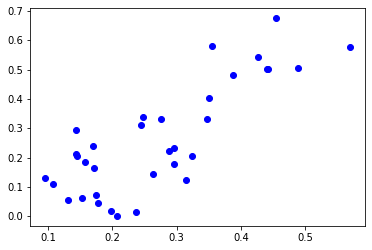

In [ ]:
for i in range(len(feature_representations)):
  plt.scatter(feature_representations[i][0],feature_representations[i][1],color='b')
plt.show()

## Recurrent Graph Neural Network. (Yet to study)
RecGNN is built with Banach fixed-point theorem. It uses contraction mapping. If we apply mapping T on x K times then $x^k$ ~ $x^{k-1}$

The parameterized function of RecGNN is defines as, \\
$x_n = \mathcal{f}_w (l_n,l_{co[n]},x_{ne[n]},l_{ne[n]})$

# Recommendation Systems

In graph-based recommendation systems, users and items are regarded as the nodes within the network.

These include:

    Users to user’s relationship
    Items to items relationship
    Users to items relationship

This can be regarded as a link prediction problem. To find and predict the missing links between users and product items.

- Users and items as a node
- User item iteraction is edges 





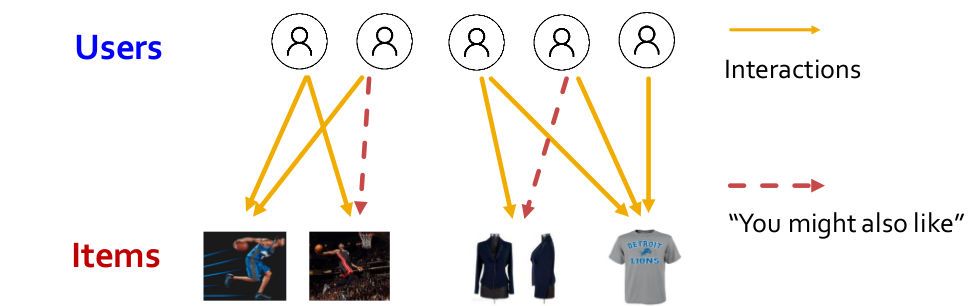


### library 
- Pytorch Geometric
- Graph Nets
- Deep graph library

# Basics of pytorch 

In [ ]:
import torch
import torch.nn as nn #modules for neural-nets
import torch.nn.functional as F #lot of functions available
import torchvision 
import torchvision.transforms as transforms
import sklearn.metrics as metrics

#### Downloading and loading in a dataset (here the MNIST handwritten digits dataset)

In [ ]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose([transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Visulization of the data 

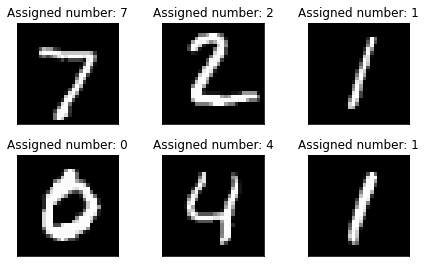

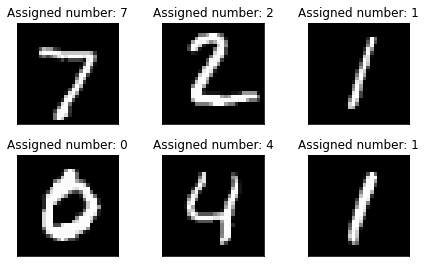

In [ ]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Assigned number: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# sample data 
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.ones((2,2))

ta = torch.tensor(a, dtype=float) #.to('cuda:0')
tb = torch.ones(2,2, dtype=float) #.to('cuda:0')

print(ta)
print(ta @ tb)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
tensor([[3., 3.],
        [7., 7.]], dtype=torch.float64)


In [ ]:
class NNModel(nn.Module):
    def __init__(self):
        #put trainanle parameterss
        super(NNModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3) #in_channel 1 as grey #applies 2d cconvolution with 32 kernel of size 3
        self.d1 = nn.Linear(26 * 26 * 32, 128) #conv2d to layer of 128 hidden neurons
        self.d2 = nn.Linear(128, 10) # 128 to 10 neurons 

    def forward(self, x):
        #design the trainable graph
        # 32x1x28x28 => 32x32x26x26 -- batchsize X image size 
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)
        #x = x.view(32, -1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
# defining hyperparameters
learning_rate = 0.001
num_epochs = 5

# calling model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if cuda support available 
model = NNModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device) 
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad() #for every iteration making gradient zero
        loss.backward() #backprop computes all the gradient 

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += (torch.argmax(logits, 1).flatten() == labels).type(torch.float).mean().item()
    
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

Epoch: 0 | Loss: 1.6429 | Train Accuracy: 0.82
Epoch: 1 | Loss: 1.4934 | Train Accuracy: 0.97
Epoch: 2 | Loss: 1.4816 | Train Accuracy: 0.98
Epoch: 3 | Loss: 1.4769 | Train Accuracy: 0.99
Epoch: 4 | Loss: 1.4746 | Train Accuracy: 0.99


In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += (torch.argmax(outputs, 1).flatten() == labels).type(torch.float).mean().item()
    preds = torch.argmax(outputs, 1).flatten()#.cpu().numpy()
    # print(preds)
    # print(labels)
    # break
        
print('Test Accuracy: %.2f'%(test_acc/i))

Test Accuracy: 0.98


### Installing pytorch geometric and supporting libs

In [ ]:
# installing PyTorch Geometric and TensorboardX
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install torch-geometric

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [ ]:
!pip install tensorboardX
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2022-04-21 10:00:09--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.19M  18.8MB/s    in 0.7s    

2022-04-21 10:00:10 (18.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


# Deep learning on graphs via Graph Neural Networks based on the Py Geometric library

We will implemwnt the GNNs using simple graph-structured example of Zachary's karate club network. This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. 

**Goal:** Detect the communities that arise from the member's interaction.

## Dataset

PyTorch Geometric provides an easy access to the dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


 we can see that,
 
- dataset holds exactly **one graph**, **34-dimensional feature vector** and **4 classes** --> which represent the community each node belongs to.


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Contains self-loops: False
Is undirected: True


In [ ]:
# data.edge_index.T

## Data

In [ ]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


 - Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
 - `data` object holds 4 attributes:
  *  The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
  * **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector)
  * **node labels** as `y` (each node is assigned to exactly one class)
  * `train_mask`, which describes for which nodes we already know their community assigments.



## Edge Index

Next we'll print the `edge_index` of our graph:

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

- `edge_index` represents graph connectivity internally.

In [ ]:
#Visulization function
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

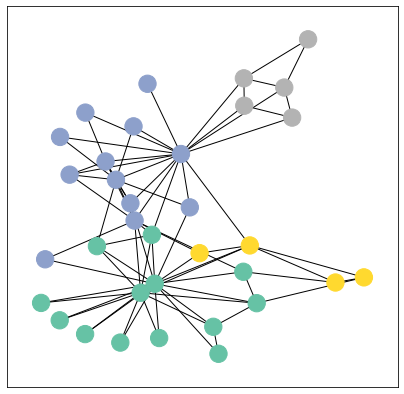

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks (GNNs)

- We will implement the most simple GNN operator, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).


### What is the output of a GNN?

 - The goal of a GNN is to take an input graph $G = (\mathcal{V}, \mathcal{E})$ where each node $v_i \in \mathcal{V}$ has an input feature vector $X_i^{(0)}$.   
 - What we want to learn is a function $f \to \mathcal{V} \times \mathcal{R}^d$, a function that takes in a node and its feature vector, as well as the graph structure, and outputs an _embedding_. 
  *  _embedding_ is a vector that represents that node in a way that's useful to our downstream task. Once we've mapped nodes and their initial features to their learned embeddings, we can use those embeddings to do a variety of different tasks including node-level, edge-level, or graph-level regression/classification.

In this colab, we want to learn embeddings that will be useful to classify each node into its community.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        hidden_dim = 4

        self.convs1 =  GCNConv(dataset.num_features, hidden_dim)
        self.convs2 =  GCNConv(hidden_dim, hidden_dim)
        self.convs3 =  GCNConv(hidden_dim, hidden_dim)
        self.classifier = Linear(hidden_dim, dataset.num_classes)

    def forward(self, x, edge_index):

        h = self.convs1(x, edge_index)
        h = h.tanh()
        h = self.convs2(h, edge_index)
        h = h.tanh()
        h = self.convs3(h, edge_index)
        embeddings = h.tanh()
        
        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        return out, embeddings

model = GCN()
print(model)

GCN(
  (convs1): GCNConv(34, 4)
  (convs2): GCNConv(4, 4)
  (convs3): GCNConv(4, 4)
  (classifier): Linear(in_features=4, out_features=4, bias=True)
)


The above code defines the forward network. 
`GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.



Embedding shape: [34, 4]


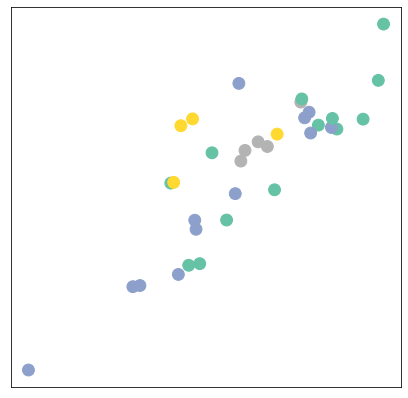

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

- With random initialisation of weights, we are able to get model produces an embedding of nodes that closely resembles the community-structure of the graph.

<IPython.core.display.Javascript object>

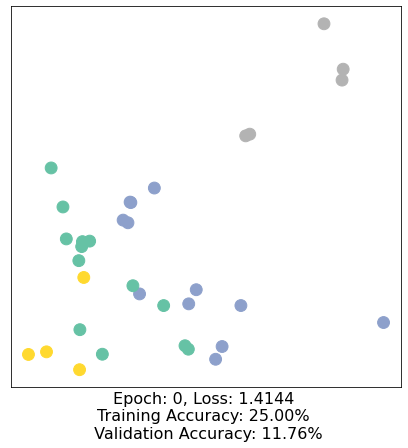

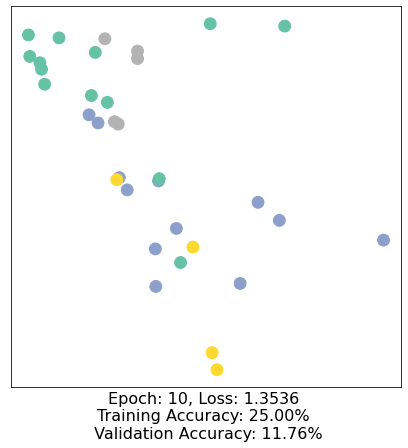

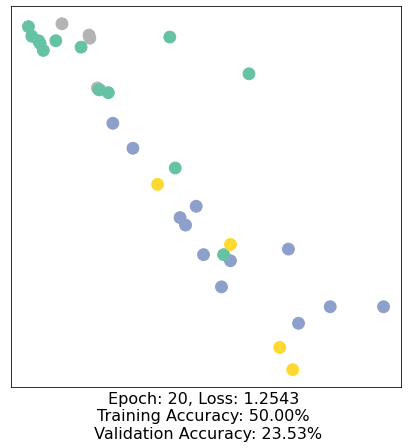

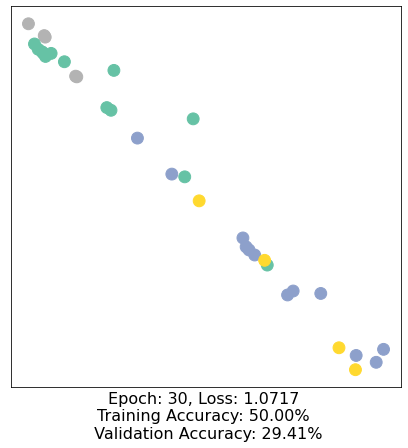

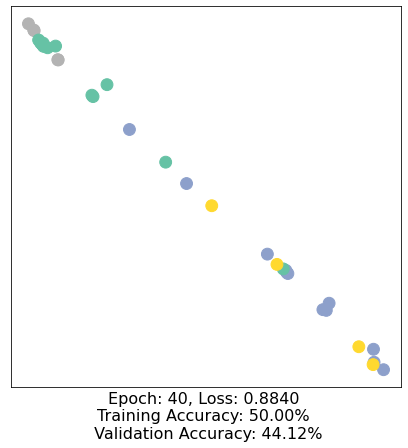

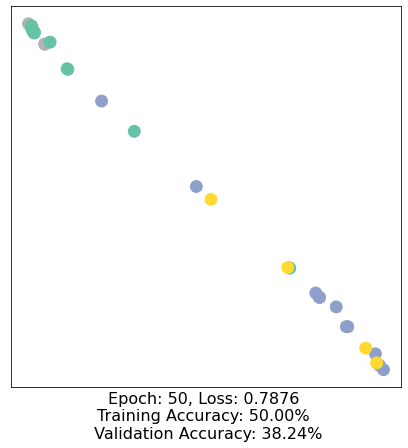

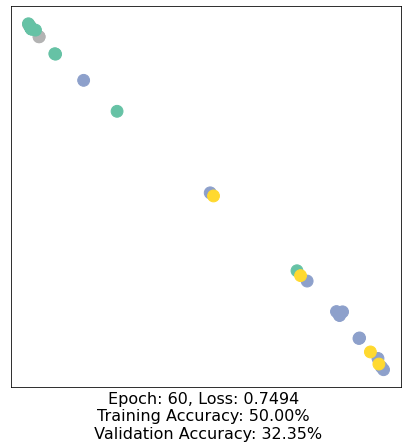

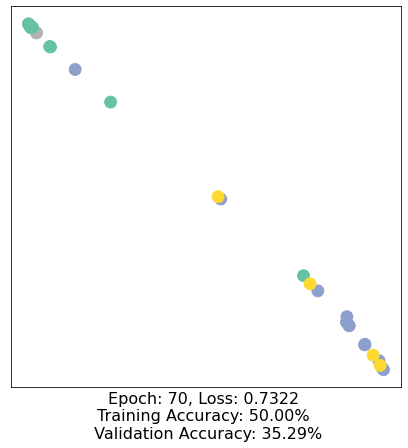

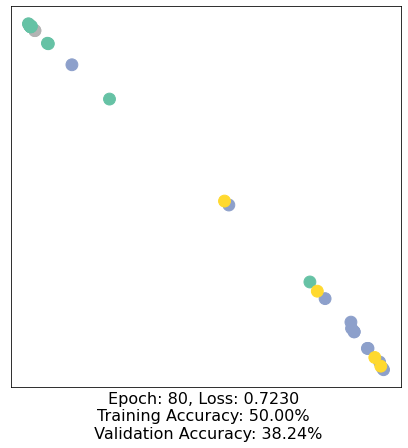

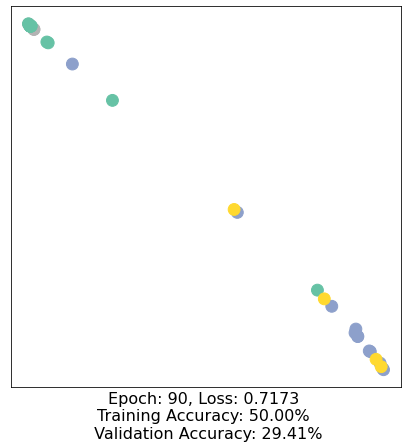

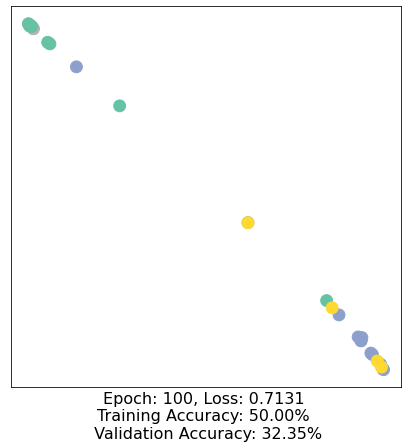

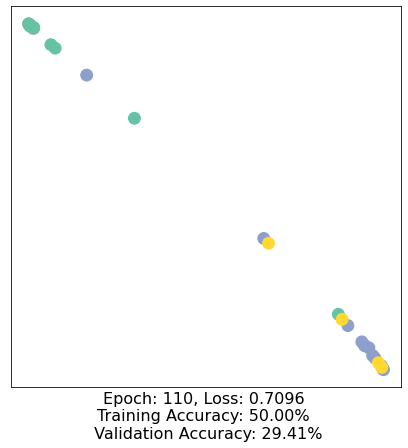

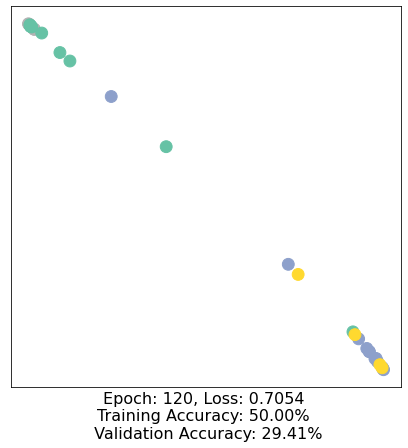

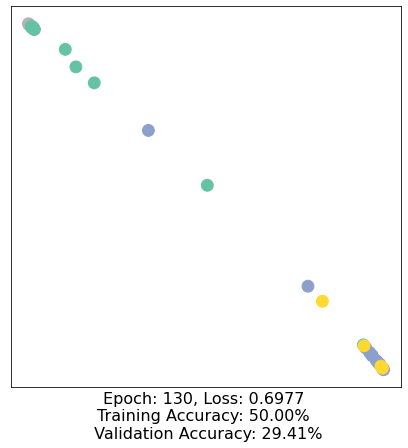

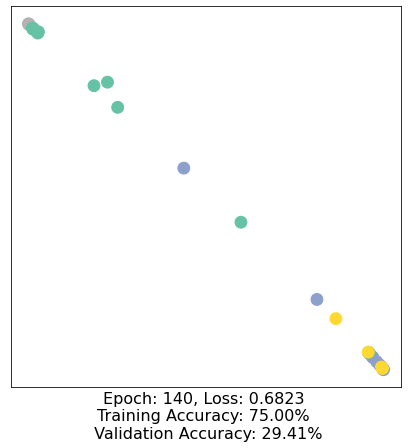

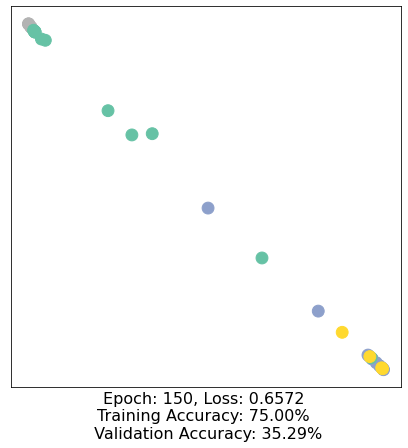

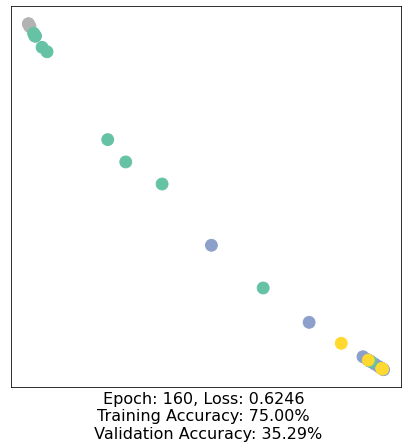

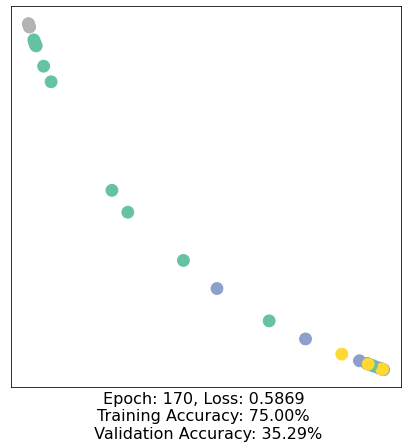

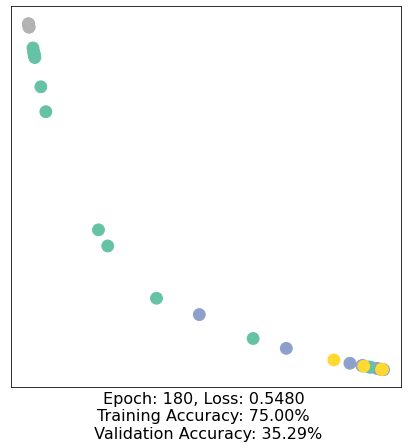

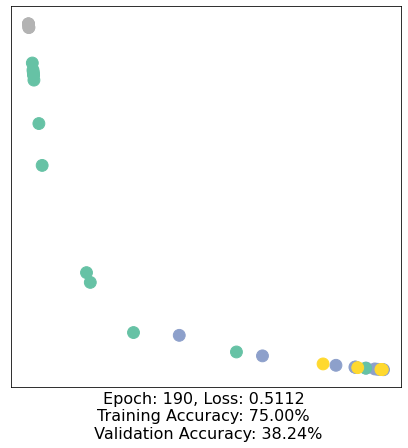

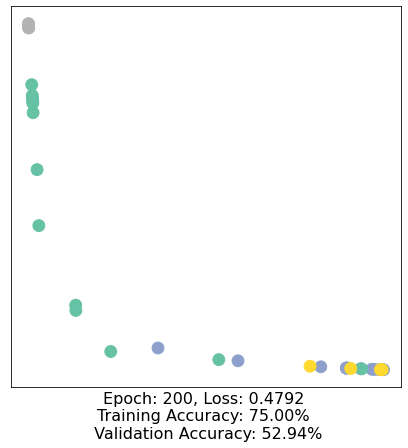

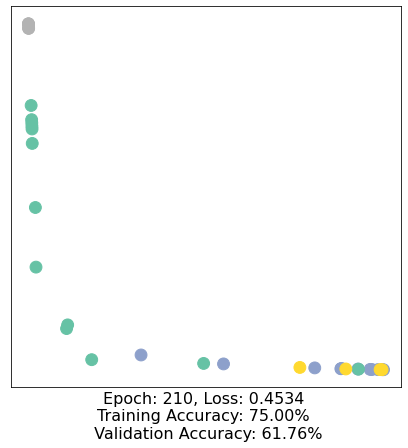

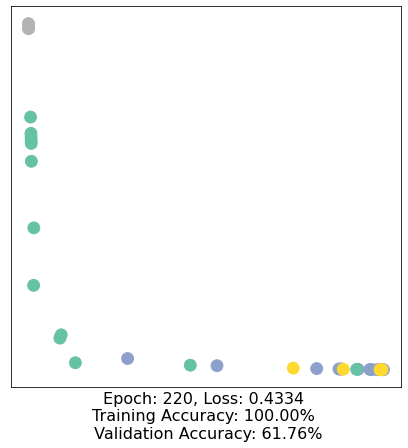

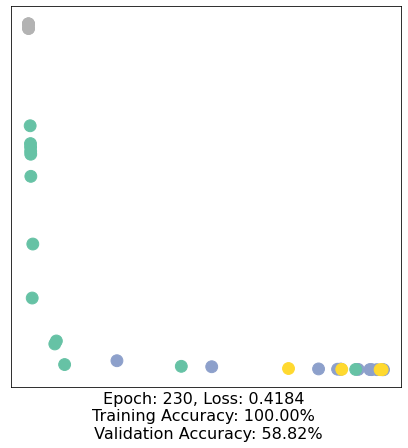

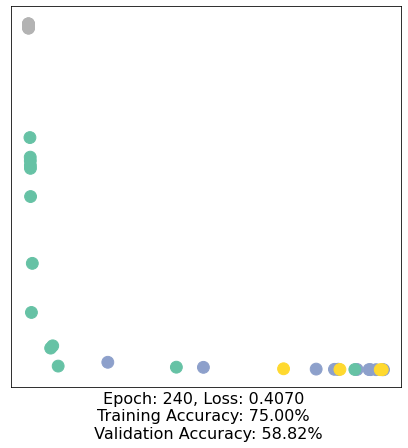

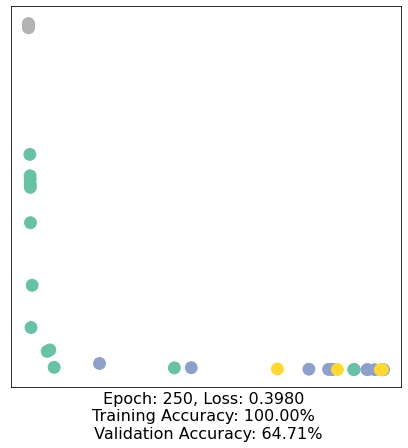

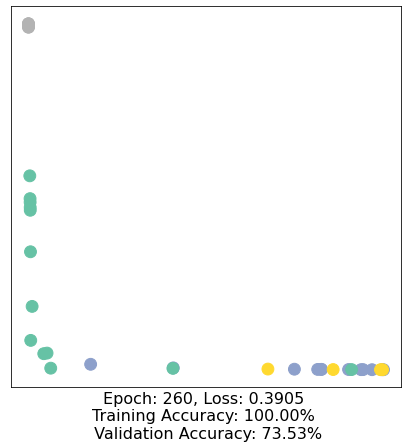

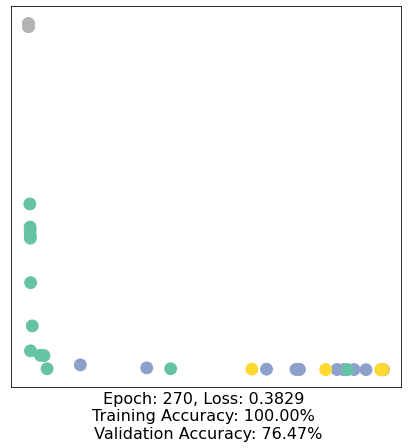

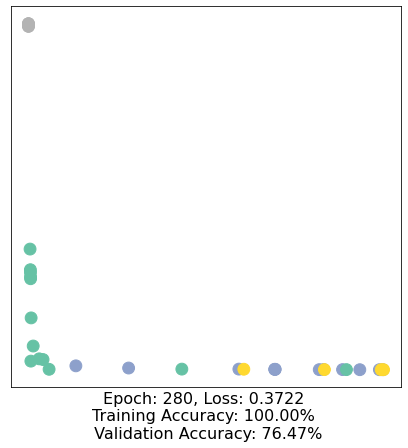

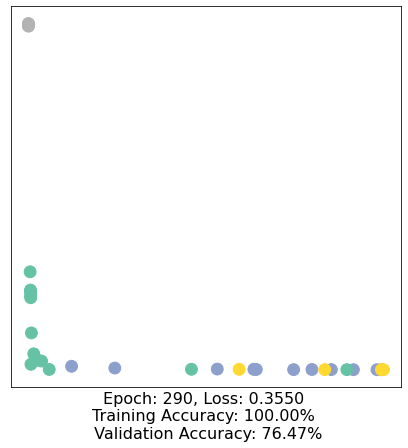

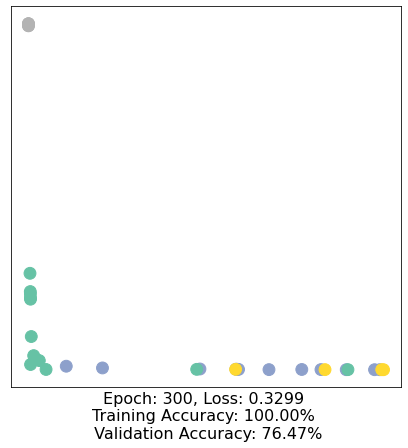

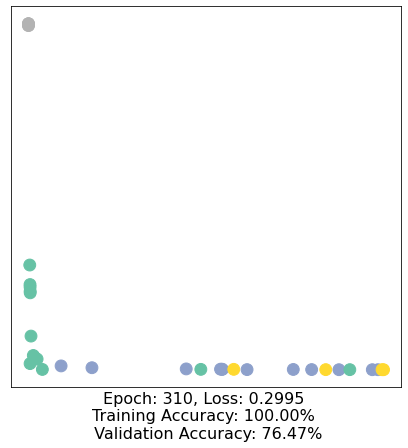

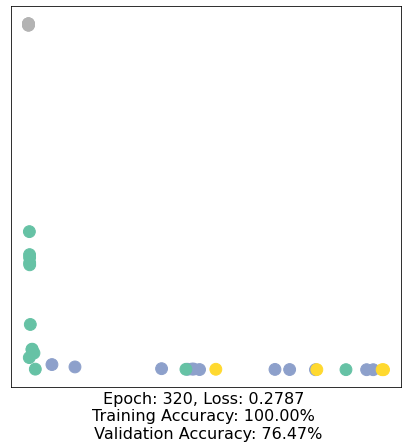

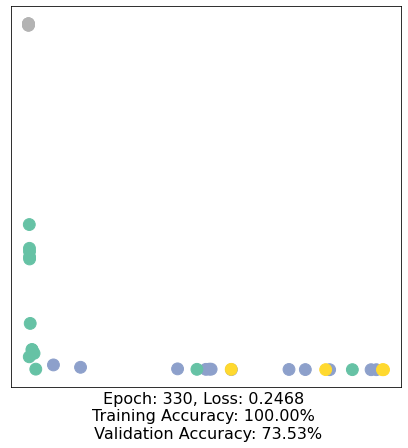

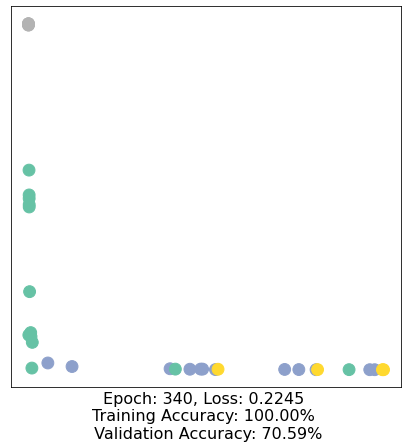

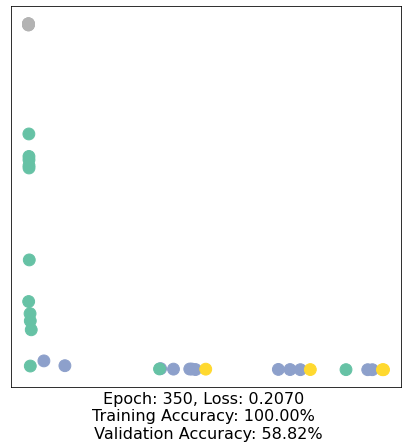

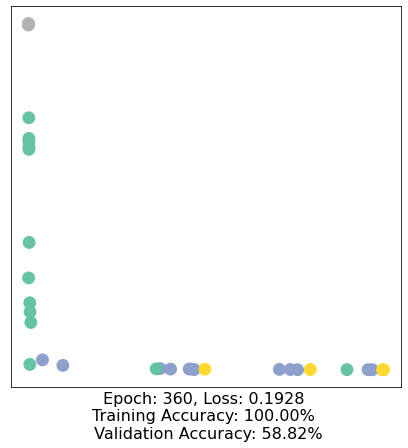

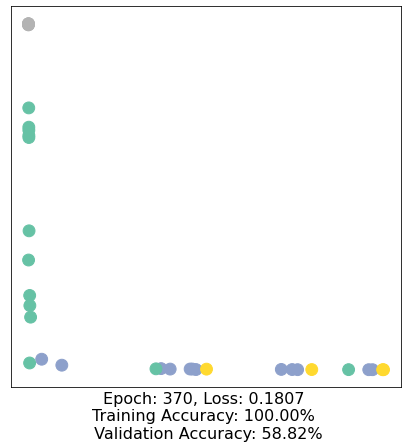

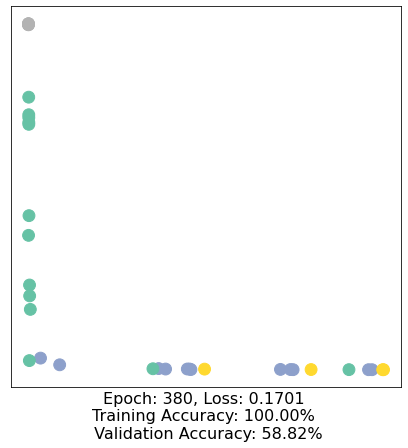

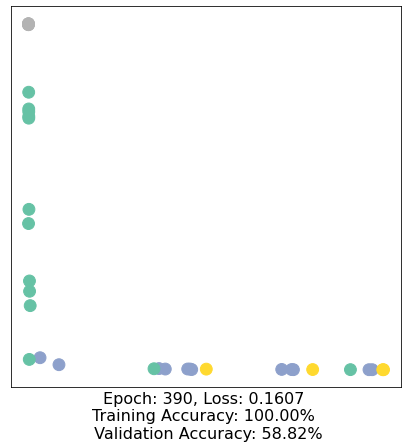

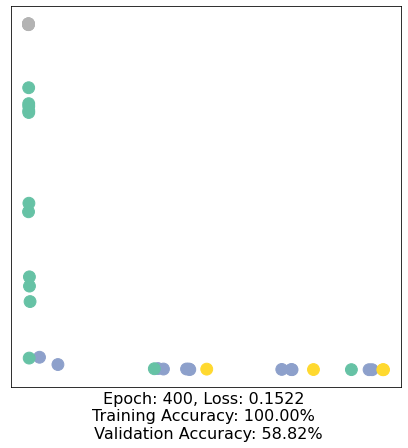

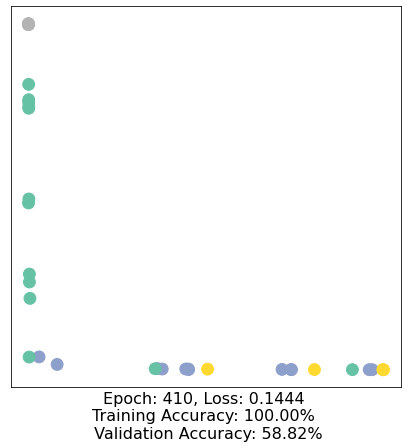

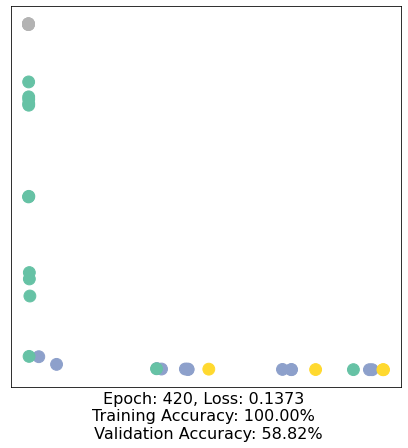

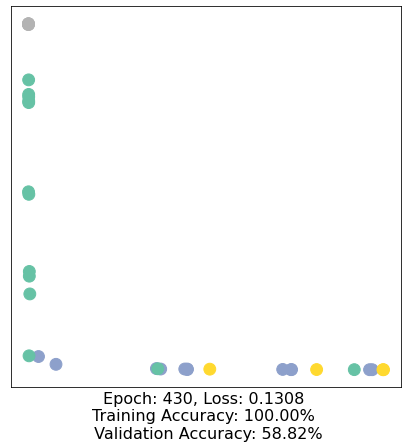

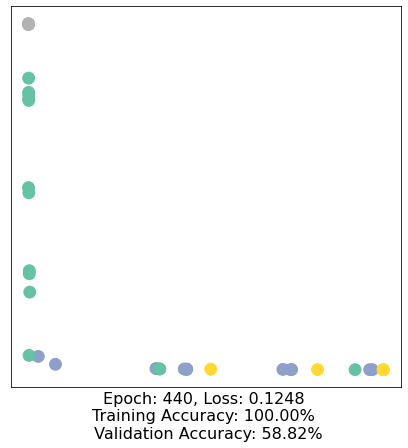

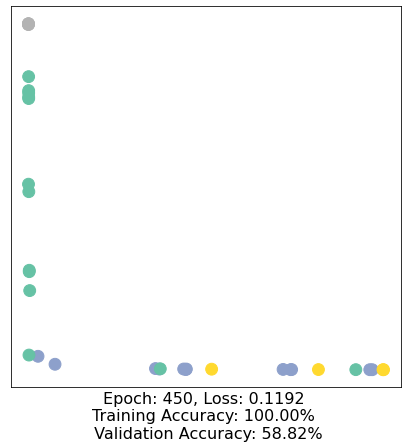

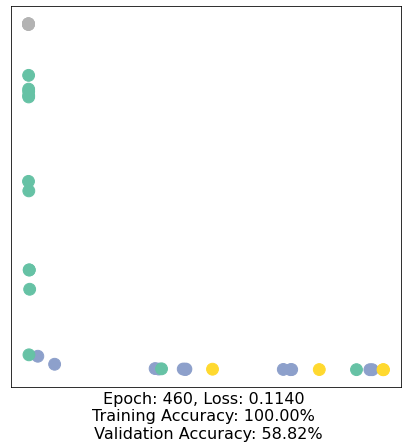

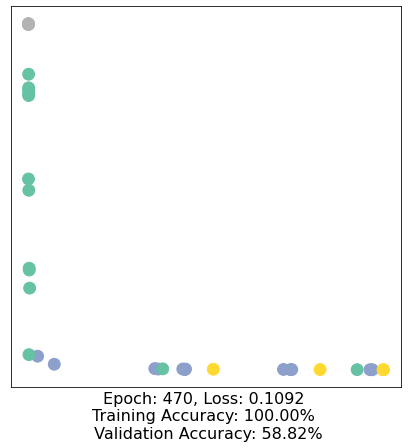

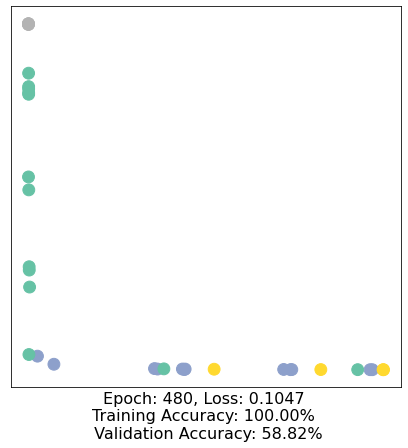

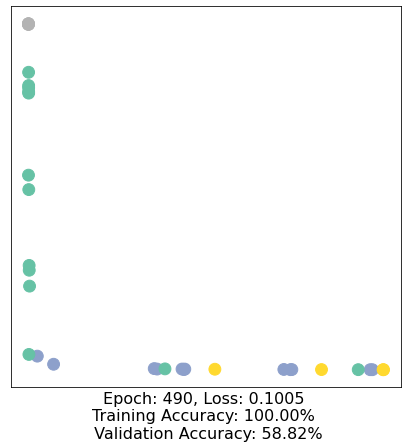

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass. #capturing node embeddings
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    
    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

With 3-layer GCN model manages to separate the communities pretty well and classify most of the nodes correctly.



# Additional Info:

## How to represent graph in efficient matrix format?
- Node Embedding  : Map nodes (of P dimension) to d dimension embedings such that similar nodes in the graph are embedded
- d<<P
- neighbourhood closness remain consistent


#### Matrix Notation

- Graph $G(V,E)$
- Input feature matrix $(NXM) = X$ \\
    where, N is number of node, M is feature vector
- Adjacency Matrix $(NXN) = A$
- Generalized neural network is represented as, \\
    $H^{l+1} = f(H^l,A)$ with $H^0 = X$  and $H^L = Z$ \\
    where,  L = number of layers


For, node-a feature vectoer is $x^a$ and for node-b feature vector is $x^b$. \\
so, GOAL: similarity(a,b) = ${z^{a}}^T z^b$ ~ ${x^{a}}^T x^b$ \\
where, Encoder function: $\mathcal{f}({x:z})$

To peform this task, 
The given can be performed using two step computational graph.

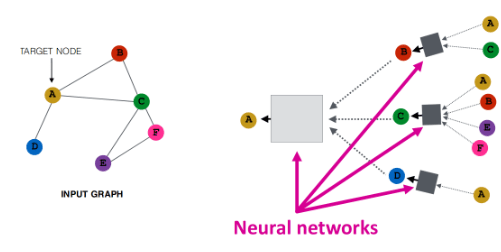

In figure(1), let' say input $x^A$ is $MX1$ and similar for all other input. \\
The output of the computaional graph is $Z_A$ which is $NX1$ where, $N<<M$.

Also, the base layer of graph is assigned as $K=0$ and layer as we go up layer increase. \\
Figure(1) has two layers k=0 (base layer) and k=1. \\
where, k=$1,2,...K-1$ indiates position in computaitonal graph.

Formulas: \\
$h_v^{0} = x_v$ (activation at the zeroth layer is feature vector itself)  

$h_v^{k} = \sigma \bigg(\underbrace{w_k \sum_{u \in N(v)} \bigg[ \frac{h_u^{k-1}}{N(v)}  \bigg]}_\text{Averaging of the neighbour}  + \underbrace{B_k h_v^{k-1}}_\text{self loop activation bias}  \bigg)$ \\
(Above is non-linear recursive eqn ) where, $N(v)$ is total number of layers \\

$Z^A = Z^M = h_v^K$

Simple layer wise propogation rule is,

$H^{l+1} = {\sigma} ( A_{NXN} H^l_{NXM} W^l_{MXP})$

where, $p<<N$ dimensional reduction (needed for node embedding)

to, add the selfloop we should use $\hat{A} = A+I$ \\
and for symmetric normalization we should use $D^{-1/2} A D^{-1/2}$

so, 

$H^{l+1} = {\sigma} ( D^{-1/2} \hat{A} D^{-1/2} H^l W^l)$

where, D is degree matrix of $\hat{A}$


Figure(1)

### Above process for each computational node:

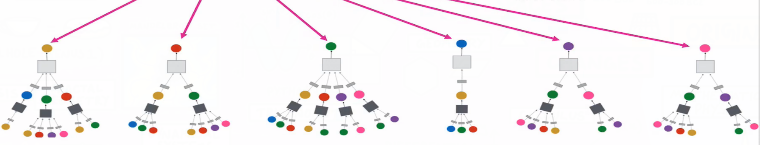